## Tectonic constrains for serpentinization and hydrogen production model
Pablo García del Real

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math
import random as rm
print 'pandas imported'
print 'numpy imported'
print 'matplotlib imported--YOU CAN MAKE PLOTS!'
print "random imported, you can do montecarlo"
%matplotlib inline

pandas imported
numpy imported
matplotlib imported--YOU CAN MAKE PLOTS!
random imported, you can do montecarlo


In [102]:
ultraslow = pandas.read_csv('ultraslow.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(ultraslow)
ultraslow.head()

cvs file imported
total number of rows is: 231


,Time_Ultraslow,Length_Ultraslow
0,0,22506.0
1,1,21780.4
2,2,19310.6
3,3,18061.8
4,4,16749.5


In [103]:
slow = pandas.read_csv('slow.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(slow)
slow.head()

cvs file imported
total number of rows is: 231


,Time_Slow,Length_Slow
0,0,23468.2
1,1,22755.0
2,2,24034.7
3,3,24645.9
4,4,24834.4


In [243]:
intermediate = pandas.read_csv('intermediate.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(intermediate)
intermediate.head()

cvs file imported
total number of rows is: 231


,Time_Intermediate,Length_Intermediate
0,0,9926.00
1,1,8502.18
2,2,9642.94
3,3,9720.53
4,4,10476.60


In [105]:
fast = pandas.read_csv('fast.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(fast)
fast.head()

cvs file imported
total number of rows is: 231


,Time_Fast,Length_Fast
0,0,11785.8
1,1,11797.0
2,2,12222.0
3,3,12290.9
4,4,12766.3


In [106]:
crazyfast = pandas.read_csv('crazyfast.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(crazyfast)
crazyfast.head()

cvs file imported
total number of rows is: 231


,Time_CrazyFast,Length_VeryFast
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [117]:
ultraslow.dtypes

Time_Ultraslow        int64
Length_Ultraslow    float64
dtype: object

In [213]:
fast_and_ultrafast = fast.Length_Fast + crazyfast.Length_VeryFast
#print fast_and_ultrafast
print intermediate.Length_Intermediate 

0       9926.00
1       8502.18
2       9642.94
3       9720.53
4      10476.60
5       8461.27
6      10152.40
7      11382.90
8      11122.60
9      10237.00
10     10930.50
11      9474.44
12     10454.80
13      9350.99
14      9159.04
15      8930.46
16      8928.41
17      9937.28
18      9742.99
19     10561.00
20     10527.60
21     11160.90
22     10972.40
23     11945.90
24     12151.30
25     11870.60
26     12254.50
27      7419.70
28      5973.60
29      5706.35
         ...   
201     2712.38
202     2707.08
203     2701.70
204     2696.22
205     2690.65
206     2684.99
207     2679.23
208     2673.38
209     2667.44
210     2661.40
211     2731.47
212     2725.24
213     2718.91
214     2712.48
215     2705.95
216     2700.68
217     2696.88
218     2693.00
219     2689.02
220     2684.95
221     1011.22
222     1006.98
223     1002.64
224      998.22
225      993.71
226      989.10
227      984.41
228      979.62
229      974.74
230      969.77
Name: Length_Intermediat

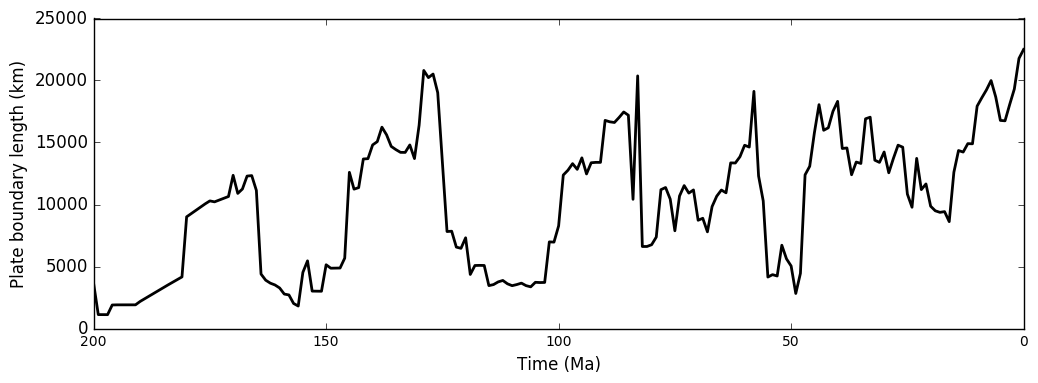

In [173]:
num_time_steps = 230


plt.figure(figsize=(12,4))
plt.plot(np.arange(0,num_time_steps + 1),ultraslow.Length_Ultraslow,color='#000000',linewidth=2)
#plt.plot(np.arange(0,num_time_steps + 1),slow.Length_Slow,'#000000',linewidth=2)
#plt.plot(np.arange(0,num_time_steps + 1),intermediate.Length_Intermediate,'#000000',linewidth=2)
#plt.plot(np.arange(0,num_time_steps + 1),fast_and_ultrafast,'#000000',linewidth=2)



plt.xlim([0,200])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (Ma)', fontsize=12)
plt.ylabel('Plate boundary length (km)', fontsize=12)
plt.gca().invert_xaxis()

plt.savefig('Spreading plates_UltraSlow.svg',transparent=True)


In [234]:
## from decimal import Decimal

# spreading rate in mm/yr applied to each classification to calculate production rate
# the division by 1000000 changes the unit from mm/yr to km/yr

MSR_ultraslow = 15 # unit mm/yr
MSR_slow = 30 # unit mm/yr
MSR_intermediate = 60 # unit mm/yr
MSR_fast = 90 # unit mm/yr

# Oceanic crust thickness (km)
CT_ultraslow = 4
CT_slow = 6
CT_intermediate = 7
CT_fast = 7
CT_transform = 6

# density serpentine g/cm^3
serpentine_density = 2.7
serpentine_densitygkm3 = serpentine_density * 100000**3

# density peridotite g/cm^3
peridotite_density = 3.3
peridotite_densitygkm3 = peridotite_density * 100000**3

# proportion peridotite in percentage
PER_ultraslow = 80   #Value 80
PER_slow =  50   #Value 50
PER_intermediate = 10   #Value 10
PER_fast = 5   #  Value 5
PER_transform = 10


# molar weights
molar_H2 = 2.016
molar_FeO = 71.844
FEO_total = 8.4 #units is wt. % derived from global compilation of FeO composition worldwide  
FEO_total_min = 8.4 - 1.7 #1 standard deviation from global compilation
FEO_total_max = 8.4 + 1.7 #1 standard deviation from gloval compilation 
FeO_to_H2 = 0.5

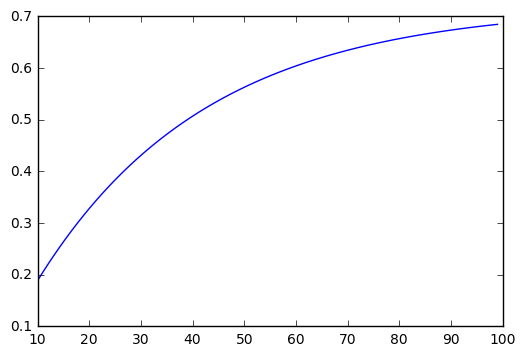

In [1]:
#Equation 2 in Andreani et al. 2013 μXANES study of iron redox state in serpentine during oceanic serpentinization
#Fe3+/FeO Total to predict degree of serpentinization 
# Fe3+/FeTOT(serp) = A(1-B^S), so that S is the degree of serpentnization, A =0.72 and B = 0.97

import matplotlib.pyplot as plt

SERP=[]
RATIO=[]


for DS in range(10,100,1):
    r=0.72*(1-0.97**DS)
    RATIO.append(r)
    SERP.append(DS)
    

fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(SERP,RATIO)
plt.show()

# Ultraslow ridge segment serpentinization and hydrogen production
### Changing serpentinization proportion

In [273]:
#Insert degree of serpentinization in percentage
DS20 = 20
DS50 =50
DS100 = 100

#Equation 2 in Andreani et al. 2013 μXANES study of iron redox state in serpentine during oceanic serpentinization
#Fe3+/FeO Total to predict degree of serpentinization 
# Fe3+/FeTOT(serp) = A(1-B^S), so that S is the degree of serpentnization, A =0.72 and B = 0.97

r20=0.72*(1-0.97**DS20)
r50=0.72*(1-0.97**DS50)
r100=0.72*(1-0.97**DS100)
#print r20,r100, r50

#Calculation Global rate of production of serpentine with time in grammes per year (g/yr)

# 20%, 50 and 100% Serpentinization

H2_ultraslow_DS20 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  

H2_ultraslow_DS50 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  

H2_ultraslow_DS100 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  

print r20,r50,r100

0.328468073093 0.56299292975 0.685762194294


### Changing iron proportion

In [178]:
#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 20% and proportion (DS) and peridotite proportion (PER)

H2_ultraslow_FEOmin_DS20 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_ultraslow_FEOmin_DS20

H2_ultraslow_FEOave_DS20 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_ultraslow_FEOave_DS20

H2_ultraslow_FEOmax_DS20 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_ultraslow_FEOmax_DS20

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 50% and proportion (DS) and peridotite proportion (PER)

H2_ultraslow_FEOmin_DS50 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOmin_DS50

H2_ultraslow_FEOave_DS50 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOave_DS50

H2_ultraslow_FEOmax_DS50 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOmax_DS50

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 100% and proportion (DS) and peridotite proportion (PER)

H2_ultraslow_FEOmin_DS100 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOmin_DS100

H2_ultraslow_FEOave_DS100 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOave_DS100

H2_ultraslow_FEOmax_DS100 = ultraslow.Length_Ultraslow * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_ultraslow_FEOmax_DS100

0      5.460105e+11
1      5.284069e+11
2      4.684879e+11
3      4.381912e+11
4      4.063540e+11
5      4.070988e+11
6      4.530072e+11
7      4.851307e+11
8      4.667533e+11
9      4.512993e+11
10     4.350009e+11
11     3.613698e+11
12     3.616852e+11
13     3.452050e+11
14     3.481866e+11
15     3.057037e+11
16     2.090614e+11
17     2.286732e+11
18     2.272552e+11
19     2.302948e+11
20     2.392992e+11
21     2.828356e+11
22     2.717146e+11
23     3.328660e+11
24     2.372123e+11
25     2.629686e+11
26     3.547394e+11
27     3.586745e+11
28     3.328830e+11
29     3.046484e+11
           ...     
201    1.213033e+08
202    1.213033e+08
203    1.213033e+08
204    1.213033e+08
205    1.213033e+08
206    1.213033e+08
207    1.695505e+10
208    1.695505e+10
209    3.003179e+10
210    1.213033e+08
211    1.695505e+10
212    1.695505e+10
213    3.003179e+10
214    3.003179e+10
215    3.003179e+10
216    3.735050e+10
217    3.771805e+10
218    3.807687e+10
219    3.842695e+10


## Slow ridge segment serpentinization and hydrogen production
### Changing serpentinization proportion

In [179]:
#Calculation Global rate of production of serpentine with time in grammes per year (g/yr)

# 20%, 50 and 100% Serpentinization

H2_slow_DS20 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_slow_DS20

H2_slow_DS50 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_DS50

H2_slow_DS100 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  
print H2_slow_DS100

0      1.283532e+12
1      1.242151e+12
2      1.101296e+12
3      1.030076e+12
4      9.552350e+11
5      9.569859e+11
6      1.064905e+12
7      1.140419e+12
8      1.097219e+12
9      1.060890e+12
10     1.022577e+12
11     8.494888e+11
12     8.502302e+11
13     8.114893e+11
14     8.184983e+11
15     7.186319e+11
16     4.914503e+11
17     5.375528e+11
18     5.342193e+11
19     5.413647e+11
20     5.625316e+11
21     6.648748e+11
22     6.387320e+11
23     7.824835e+11
24     5.576258e+11
25     6.181724e+11
26     8.339023e+11
27     8.431527e+11
28     7.825234e+11
29     7.161511e+11
           ...     
201    2.851533e+08
202    2.851533e+08
203    2.851533e+08
204    2.851533e+08
205    2.851533e+08
206    2.851533e+08
207    3.985702e+10
208    3.985702e+10
209    7.059711e+10
210    2.851533e+08
211    3.985702e+10
212    3.985702e+10
213    7.059711e+10
214    7.059711e+10
215    7.059711e+10
216    8.780155e+10
217    8.866557e+10
218    8.950905e+10
219    9.033200e+10


In [180]:
#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 20% and proportion (DS) and peridotite proportion (PER)

H2_slow_FEOmin_DS20 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_slow_FEOmin_DS20

H2_slow_FEOave_DS20 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_slow_FEOave_DS20

H2_slow_FEOmax_DS20 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_slow_FEOmax_DS20

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 50% and proportion (DS) and peridotite proportion (PER)

H2_slow_FEOmin_DS50 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOmin_DS50

H2_slow_FEOave_DS50 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOave_DS50

H2_slow_FEOmax_DS50 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOmax_DS50

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 100% and proportion (DS) and peridotite proportion (PER)

H2_slow_FEOmin_DS100 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOmin_DS100

H2_slow_FEOave_DS100 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOave_DS100

H2_slow_FEOmax_DS100 = ultraslow.Length_Ultraslow * CT_slow * MSR_slow/1000000.0 * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_slow_FEOmax_DS100

0      1.023770e+12
1      9.907630e+11
2      8.784149e+11
3      8.216085e+11
4      7.619137e+11
5      7.633102e+11
6      8.493885e+11
7      9.096202e+11
8      8.751624e+11
9      8.461861e+11
10     8.156268e+11
11     6.775684e+11
12     6.781598e+11
13     6.472593e+11
14     6.528499e+11
15     5.731945e+11
16     3.919901e+11
17     4.287623e+11
18     4.261035e+11
19     4.318028e+11
20     4.486859e+11
21     5.303168e+11
22     5.094648e+11
23     6.241237e+11
24     4.447730e+11
25     4.930661e+11
26     6.651364e+11
27     6.725146e+11
28     6.241556e+11
29     5.712158e+11
           ...     
201    2.274437e+08
202    2.274437e+08
203    2.274437e+08
204    2.274437e+08
205    2.274437e+08
206    2.274437e+08
207    3.179072e+10
208    3.179072e+10
209    5.630960e+10
210    2.274437e+08
211    3.179072e+10
212    3.179072e+10
213    5.630960e+10
214    5.630960e+10
215    5.630960e+10
216    7.003219e+10
217    7.072135e+10
218    7.139412e+10
219    7.205053e+10


## Intermediate ridge segment serpentinization and hydrogen production
### Changing serpentinization proportion

In [183]:
#Calculation Global rate of production of serpentine with time in grammes per year (g/yr)

# 20%, 50 and 100% Serpentinization

H2_intermediate_DS20 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_intermediate_DS20

H2_intermediate_DS50 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_DS50

H2_intermediate_DS100 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  
print H2_intermediate_DS100

0      2.641736e+11
1      2.262796e+11
2      2.566402e+11
3      2.587052e+11
4      2.788275e+11
5      2.251908e+11
6      2.701991e+11
7      3.029480e+11
8      2.960203e+11
9      2.724507e+11
10     2.909077e+11
11     2.521557e+11
12     2.782473e+11
13     2.488701e+11
14     2.437615e+11
15     2.376780e+11
16     2.376235e+11
17     2.644738e+11
18     2.593029e+11
19     2.810737e+11
20     2.801848e+11
21     2.970396e+11
22     2.920228e+11
23     3.179319e+11
24     3.233984e+11
25     3.159278e+11
26     3.261450e+11
27     1.974702e+11
28     1.589832e+11
29     1.518706e+11
           ...     
201    7.218812e+10
202    7.204706e+10
203    7.190388e+10
204    7.175803e+10
205    7.160979e+10
206    7.145915e+10
207    7.130585e+10
208    7.115016e+10
209    7.099207e+10
210    7.083132e+10
211    7.269618e+10
212    7.253038e+10
213    7.236191e+10
214    7.219078e+10
215    7.201699e+10
216    7.187673e+10
217    7.177560e+10
218    7.167233e+10
219    7.156641e+10


In [184]:
#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 20% and proportion (DS) and peridotite proportion (PER)

H2_intermediate_FEOmin_DS20 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_intermediate_FEOmin_DS20

H2_intermediate_FEOave_DS20 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_intermediate_FEOave_DS20

H2_intermediate_FEOmax_DS20 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_intermediate_FEOmax_DS20

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 50% and proportion (DS) and peridotite proportion (PER)

H2_intermediate_FEOmin_DS50 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOmin_DS50

H2_intermediate_FEOave_DS50 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOave_DS50

H2_intermediate_FEOmax_DS50 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOmax_DS50

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 100% and proportion (DS) and peridotite proportion (PER)

H2_intermediate_FEOmin_DS100 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOmin_DS100

H2_intermediate_FEOave_DS100 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOave_DS100

H2_intermediate_FEOmax_DS100 = intermediate.Length_Intermediate * CT_intermediate * MSR_intermediate/1000000.0 * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_intermediate_FEOmax_DS100

0      2.107099e+11
1      1.804849e+11
2      2.047011e+11
3      2.063482e+11
4      2.223981e+11
5      1.796165e+11
6      2.155159e+11
7      2.416371e+11
8      2.361114e+11
9      2.173118e+11
10     2.320335e+11
11     2.011242e+11
12     2.219353e+11
13     1.985036e+11
14     1.944288e+11
15     1.895765e+11
16     1.895330e+11
17     2.109494e+11
18     2.068250e+11
19     2.241897e+11
20     2.234807e+11
21     2.369245e+11
22     2.329230e+11
23     2.535885e+11
24     2.579488e+11
25     2.519900e+11
26     2.601395e+11
27     1.575060e+11
28     1.268081e+11
29     1.211348e+11
           ...     
201    5.757862e+10
202    5.746611e+10
203    5.735190e+10
204    5.723557e+10
205    5.711733e+10
206    5.699718e+10
207    5.687491e+10
208    5.675072e+10
209    5.662463e+10
210    5.649641e+10
211    5.798386e+10
212    5.785161e+10
213    5.771724e+10
214    5.758074e+10
215    5.744212e+10
216    5.733025e+10
217    5.724958e+10
218    5.716722e+10
219    5.708273e+10


## Fast ridge segment serpentinization and hydrogen production
### Changing serpentinization proportion

In [185]:
#Calculation Global rate of production of serpentine with time in grammes per year (g/yr)

# 20%, 50 and 100% Serpentinization

H2_fast_DS20 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_fast_DS20

H2_fast_DS50 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_DS50

H2_fast_DS100 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  
print H2_fast_DS100

0      2.352532e+11
1      2.354767e+11
2      2.439601e+11
3      2.453353e+11
4      2.548247e+11
5      2.832148e+11
6      2.574954e+11
7      2.319776e+11
8      2.347761e+11
9      2.469921e+11
10     2.633359e+11
11     2.137335e+11
12     2.193664e+11
13     2.194802e+11
14     2.216440e+11
15     2.450998e+11
16     2.518386e+11
17     2.704579e+11
18     2.724081e+11
19     2.831490e+11
20     2.983311e+11
21     2.801109e+11
22     2.962352e+11
23     2.545153e+11
24     2.886022e+11
25     2.737774e+11
26     3.638761e+11
27     3.920866e+11
28     4.119975e+11
29     4.368306e+11
           ...     
201    5.695475e+11
202    5.713500e+11
203    5.822206e+11
204    5.847436e+11
205    5.860830e+11
206    5.854702e+11
207    5.848055e+11
208    5.843105e+11
209    5.839252e+11
210    5.840151e+11
211    5.887957e+11
212    5.886300e+11
213    5.884723e+11
214    5.881030e+11
215    5.876120e+11
216    5.873545e+11
217    5.866738e+11
218    5.858754e+11
219    5.849452e+11


In [186]:
#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 20% and proportion (DS) and peridotite proportion (PER)

H2_fast_FEOmin_DS20 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_fast_FEOmin_DS20

H2_fast_FEOave_DS20 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_fast_FEOave_DS20

H2_fast_FEOmax_DS20 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
print H2_fast_FEOmax_DS20

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 50% and proportion (DS) and peridotite proportion (PER)

H2_fast_FEOmin_DS50 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOmin_DS50

H2_fast_FEOave_DS50 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOave_DS50

H2_fast_FEOmax_DS50 = fast.Length_Fast* CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOmax_DS50

#Calculation changing the proportion of iron, with min and max given by standard deviation of 1s=1.7
# Fixed serpentinization rate at 100% and proportion (DS) and peridotite proportion (PER)

H2_fast_FEOmin_DS100 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_min/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOmin_DS100

H2_fast_FEOave_DS100 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOave_DS100

H2_fast_FEOmax_DS100 = fast.Length_Fast * CT_fast * MSR_fast/1000000.0 * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total_max/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
print H2_fast_FEOmax_DS100

0      1.876424e+11
1      1.878207e+11
2      1.945872e+11
3      1.956841e+11
4      2.032530e+11
5      2.258975e+11
6      2.053833e+11
7      1.850298e+11
8      1.872619e+11
9      1.970056e+11
10     2.100418e+11
11     1.704779e+11
12     1.749708e+11
13     1.750616e+11
14     1.767874e+11
15     1.954963e+11
16     2.008712e+11
17     2.157224e+11
18     2.172779e+11
19     2.258450e+11
20     2.379546e+11
21     2.234218e+11
22     2.362828e+11
23     2.030062e+11
24     2.301946e+11
25     2.183701e+11
26     2.902345e+11
27     3.127358e+11
28     3.286170e+11
29     3.484244e+11
           ...     
201    4.542820e+11
202    4.557196e+11
203    4.643902e+11
204    4.664027e+11
205    4.674710e+11
206    4.669822e+11
207    4.664520e+11
208    4.660572e+11
209    4.657499e+11
210    4.658215e+11
211    4.696346e+11
212    4.695025e+11
213    4.693767e+11
214    4.690822e+11
215    4.686905e+11
216    4.684851e+11
217    4.679422e+11
218    4.673054e+11
219    4.665635e+11


## All Spreading Velocities (ultraslow, slow, intermediate, fast)
### Changing asymmetry proportion 




In [278]:
# Define assymetry proportion for each type of spreading rate configuration
# AP_spreading rate = assymetry proportion for each given spreading rate 
# Constant rate of serpentinization, r50 = 50%, iron content 8.4 wt. %

#Ultraslow (Cannat et al., 2006; Dick et al., 2003; Michael et al., 2003; Tucholke et al. 2008) use 4%

#AP_ultraslow = 0.04

H2_ultraslow_asymmetry = (((ultraslow.Length_Ultraslow)*(1-AP_ultraslow) * CT_ultraslow * MSR_ultraslow/1000000.0) + ((ultraslow.Length_Ultraslow)*(AP_ultraslow) * (0.5)* CT_ultraslow * MSR_ultraslow/1000000.0)) * PER_ultraslow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r50 * FeO_to_H2  
#print H2_ultraslow_asymmetry

#Updated tectonic configuration based on Cannat et al. 2006

#Volcanic seafloor calculation

AP_volcanic = 0 # Not included in calculation, just for reference
Ultraslow_proportion_volcanic = 40 #40% Volcanic symmetric seafloor in Cannat et al. 2006
PER_ultraslow_volcanic = 20 #20
PER_ultraslow_volcanic10 = 20

H2_ultraslow_volcanic_symmetry = ultraslow.Length_Ultraslow * Ultraslow_proportion_volcanic/100.0 * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow_volcanic/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_ultraslow_volcanic_symmetry10 = ultraslow.Length_Ultraslow * Ultraslow_proportion_volcanic/100.0 * CT_ultraslow * MSR_ultraslow/1000000.0 * PER_ultraslow_volcanic10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  


AP_corrugated = 0.5
Ultraslow_proportion_corrugated = 7
PER_ultraslow_corrugated = 100 #80
PER_ultraslow_corrugated10 = 100

H2_ultraslow_corrugated_asymmetry = (((ultraslow.Length_Ultraslow)*(1-AP_corrugated) * CT_slow * MSR_slow/1000000.0) + ((ultraslow.Length_Ultraslow)*(AP_slow) * (0.5)* CT_slow * MSR_slow/1000000.0)) * PER_ultraslow_corrugated/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_ultraslow_corrugated_asymmetry10 = (((ultraslow.Length_Ultraslow)*(1-AP_corrugated) * CT_slow * MSR_slow/1000000.0) + ((ultraslow.Length_Ultraslow)*(AP_slow) * (0.5)* CT_slow * MSR_slow/1000000.0)) * PER_ultraslow_corrugated10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  


AP_smooth = 0.5
Ultraslow_proportion_smooth_sym = 23
PER_ultraslow_smooth_sym = 100  #80
PER_ultraslow_smooth_sym10 = 100
Ultraslow_proportion_smooth_asym = 28
PER_ultraslow_smooth_asym = 100  #80
PER_ultraslow_smooth_asym10 = 100

H2_ultraslow_smooth_asymmetry = (ultraslow.Length_Ultraslow)*(Ultraslow_proportion_smooth_asym/100.0)*(1-AP_smooth) * CT_slow * MSR_slow/1000000.0 * PER_ultraslow_smooth_asym/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_ultraslow_smooth_symmetry = (ultraslow.Length_Ultraslow)*(Ultraslow_proportion_smooth_sym/100.0) * CT_slow * MSR_slow/1000000.0 * PER_ultraslow_smooth_sym/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  

H2_ultraslow_smooth_asymmetry10 = (ultraslow.Length_Ultraslow)*(Ultraslow_proportion_smooth_asym/100.0)*(1-AP_smooth) * CT_slow * MSR_slow/1000000.0 * PER_ultraslow_smooth_asym10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  
H2_ultraslow_smooth_symmetry10 = (ultraslow.Length_Ultraslow)*(Ultraslow_proportion_smooth_sym/100.0) * CT_slow * MSR_slow/1000000.0 * PER_ultraslow_smooth_sym10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  


# Total ultraslow 

H2_ultraslow_seafloor = H2_ultraslow_volcanic_symmetry + H2_ultraslow_corrugated_asymmetry + H2_ultraslow_smooth_asymmetry + H2_ultraslow_smooth_symmetry
H2_ultraslow_seafloor10 = H2_ultraslow_volcanic_symmetry10 + H2_ultraslow_corrugated_asymmetry10 + H2_ultraslow_smooth_asymmetry10 + H2_ultraslow_smooth_symmetry10


#print H2_ultraslow_seafloor

#Slow (Cannat et al., 1995; Cannat et al., 2009) use 50%

AP_slow = 0.5
PER_slow10 = 50 #50

H2_slow_asymmetry = (((slow.Length_Slow)*(1-AP_slow) * CT_slow * MSR_slow/1000000.0) + ((slow.Length_Slow)*(AP_slow) * (0.5)* CT_slow * MSR_slow/1000000.0)) * PER_slow/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_slow_asymmetry10 = (((slow.Length_Slow)*(1-AP_slow) * CT_slow * MSR_slow/1000000.0) + ((slow.Length_Slow)*(AP_slow) * (0.5)* CT_slow * MSR_slow/1000000.0)) * PER_slow10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  

#print H2_slow_asymmetry

#Intermediate (Cannat et al., 1995; Cannat et al., 2009) use 25%

AP_intermediate = 0.25
PER_intermediate10 = 10

H2_intermediate_asymmetry = (((intermediate.Length_Intermediate)*(1-AP_intermediate) * CT_intermediate * MSR_intermediate/1000000.0) + ((intermediate.Length_Intermediate)*(AP_intermediate) * (0.5)* CT_intermediate * MSR_intermediate/1000000.0)) * PER_intermediate/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_intermediate_asymmetry10 = (((intermediate.Length_Intermediate)*(1-AP_intermediate) * CT_intermediate * MSR_intermediate/1000000.0) + ((intermediate.Length_Intermediate)*(AP_intermediate) * (0.5)* CT_intermediate * MSR_intermediate/1000000.0)) * PER_intermediate10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  


#print H2_intermediate_asymmetry

#Fast No OCC (megamullions) >76 mm/yr; Tucholke et al., 2008; use 0%

AP_fast = 0.0
PER_fast10 = 5

H2_fast_asymmetry = (((fast.Length_Fast)*(1-AP_fast) * CT_fast * MSR_fast/1000000.0) + ((fast.Length_Fast)*(AP_fast) * (0.5)* CT_fast * MSR_fast/1000000.0)) * PER_fast/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r20 * FeO_to_H2  
H2_fast_asymmetry10 = (((fast.Length_Fast)*(1-AP_fast) * CT_fast * MSR_fast/1000000.0) + ((fast.Length_Fast)*(AP_fast) * (0.5)* CT_fast * MSR_fast/1000000.0)) * PER_fast10/100.0 * peridotite_densitygkm3 * FEO_total/100.0 * (1.0/molar_FeO) * r100 * FeO_to_H2  

#print H2_fast_asymmetry



In [225]:
#Quality control to match previous computation. By setting AP values to 0, computation should match values for FEOave and DS50. 

H2_all_asymmetry = H2_ultraslow_asymmetry + H2_slow_asymmetry + H2_intermediate_asymmetry + H2_fast_asymmetry
H2_all_symmetry = H2_ultraslow_FEOave_DS50 + H2_slow_FEOave_DS50 + H2_intermediate_FEOave_DS50  + H2_fast_FEOave_DS50

#print H2_all_asymmetry,H2_all_symmetry
percentage = (H2_all_symmetry * 100.0 / H2_all_asymmetry)-100
#print percentage

# Plotting results

### This section plots the following diagrams. Used for Goldschmidt poster 2017. 

#### Fig. 3 H2 production as a function of serpentinization extent
#### Fig. 4 H2 production as a function of iron content
#### Fig. 5 H2 production with asymetry calculations
#### Fig. 6 H2 production with lowest possible values with and without asymmetry

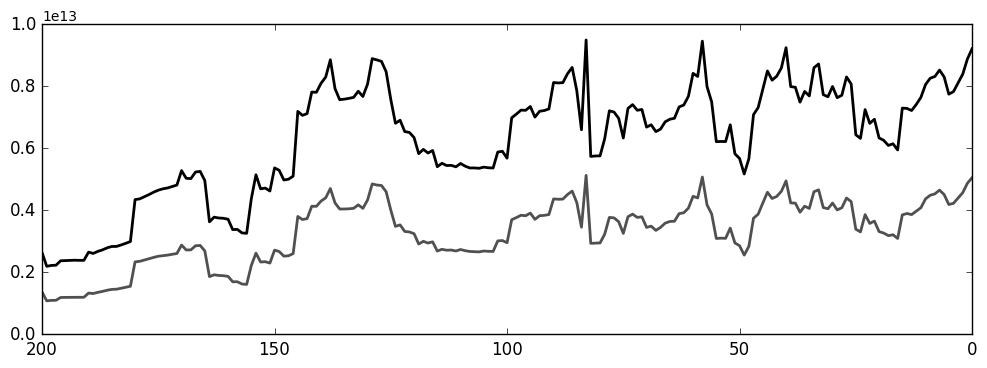

In [280]:
#Plot as a function of asymmetry 



plt.figure(figsize=(12,4))

#plt.plot(H2_ultraslow_seafloor10, label = "Ultraslow", color='#2d7cb6', linewidth=2)
#plt.plot(H2_slow_asymmetry10, label = "Slow",color='#add8a4', linewidth=2)
#plt.plot(H2_intermediate_asymmetry10, label = "Intermediate",color='#fcb864', linewidth=2)
#plt.plot(H2_fast_asymmetry, label = "Fast",color='#d72027', linewidth=2)
plt.plot(H2_ultraslow_seafloor+H2_slow_asymmetry + H2_intermediate_asymmetry + H2_fast_asymmetry, label = "Fast",color='#515051', linewidth=2)
plt.plot(H2_ultraslow_seafloor10+H2_slow_asymmetry10 + H2_intermediate_asymmetry10 + H2_fast_asymmetry10, label = "Fast",color='#000000', linewidth=2)


#plt.title('H2 production with asymmetry proportion in ridges)
#plt.xlabel('Time (Ma)',fontsize=12)
#plt.ylabel('Production x 10^12 (mol/yr)',fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlim([0,200])
plt.gca().invert_xaxis()

#plt.show()
plt.savefig('AllRates_H2_asymmetryPERandDS.svg',transparent=True)


In [ ]:
#Plotting Serpentinization Production FIG 4

H2fastFEOmax=[]
H2fastFEOmin=[]
H2intermediateFEOmax=[]
H2interdiateFEOmin=[]
H2slowFEOmax=[]
H2slowFEOmin=[]
H2ultraslowFEOmax=[]
H2ultraslowFEOmin=[]

H2fastFEOmax.append(H2_fast_FEOmax)
H2fastFEOmin.append(H2_fast_FEOmin)
H2intermediateFEOmax.append(H2_intermediate_FEOmax)
H2intermediateFEOmin.append(H2_intermediate_FEOmin)
H2slowFEOmax.append(H2_slow_FEOmax)
H2slowFEOmin.append(H2_slow_FEOmin)
H2ultraslowFEOmax.append(H2_ultraslow_FEOmax)
H2ultraslowFEOmin.append(H2_ultraslow_FEOmin)

#
plt.figure(figsize=(12,8))

#Fill between gradients from 20 to 100 km
plt.fill_between(np.arange(0,num_time_steps + 1),H2fastFEOmax,H2fastFEOmin,color='#000080', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2intermediateFEOmax,H2intermediateFEOmin,color='#483d8b', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2slowFEOmax,H2slowFEOmin,color='#1e90ff', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowFEOmax,H2slowFEOmin,color='#4682b4', alpha = 1)

plt.gca().invert_xaxis()

#plt.title('H2 production rate based on FEO content',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^12 (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()


ValueError: Argument dimensions are incompatible

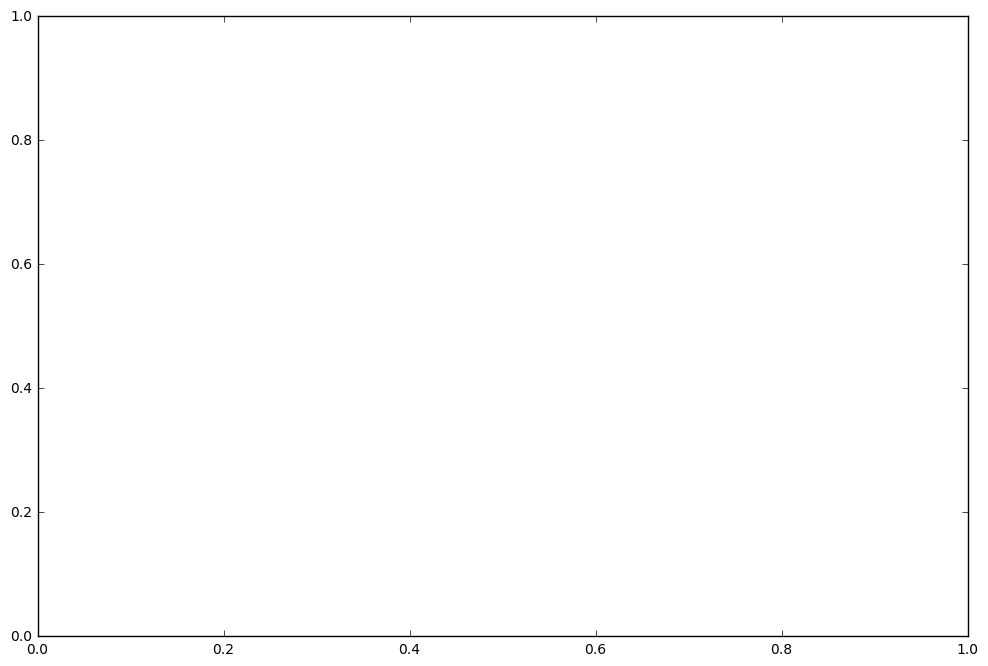

In [192]:
#Plotting Serpentinization Production FIG 3
import matplotlib.pyplot as plt
import numpy as np

H2fastDS100=[]
H2fastDS20=[]
H2intermediateDS100=[]
H2intermediateDS20=[]
H2slowDS100=[]
H2slowDS20=[]
H2ultraslowDS100=[]
H2ultraslowDS20=[]

H2fastDS100.append(H2_fast_DS100)
H2fastDS20.append(H2_fast_DS20)
H2intermediateDS100.append(H2_intermediate_DS100)
H2intermediateDS20.append(H2_intermediate_DS20)
H2slowDS100.append(H2_slow_DS100)
H2slowDS20.append(H2_slow_DS20)
H2ultraslowDS100.append(H2_ultraslow_DS100)
H2ultraslowDS20.append(H2_ultraslow_DS20)

#
plt.figure(figsize=(12,8))

#Fill between gradients from 20 to 100 km
plt.fill_between(np.arange(0,num_time_steps + 1),H2fastDS100,H2fastDS20,color='#2f4f4f', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2intermediateDS100,H2intermediateDS20,color='#696969', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2slowDS100,H2slowDS20,color='#708090', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowDS100,H2slowDS20,color='#bebebe', alpha = 1)

plt.gca().invert_xaxis()

#plt.title('H2 production rate based on degree of serpentinization',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^12 (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()


In [194]:
#Plot as a function of tectonic control in ultraslow spreading ridges 

H2ultraslowvolcanicsymmetry = []
H2ultraslowsmoothsymmetry = []
H2ultraslowsmoothasymmetry = []
H2ultraslowcorrugatedasymmetry = []
H2ultraslowvolcanicsymmetry10 = []
H2ultraslowsmoothsymmetry10 = []
H2ultraslowsmoothasymmetry10 = []
H2ultraslowcorrugatedasymmetry10 = []

H2ultraslowvolcanicsymmetry.append(H2_ultraslow_volcanic_symmetry)
H2ultraslowsmoothsymmetry.append(H2_ultraslow_smooth_symmetry)
H2ultraslowsmoothasymmetry.append(H2_ultraslow_smooth_asymmetry)
H2ultraslowcorrugatedasymmetry.append(H2_ultraslow_corrugated_asymmetry)
H2ultraslowvolcanicsymmetry10.append(H2_ultraslow_volcanic_symmetry10)
H2ultraslowsmoothsymmetry10.append(H2_ultraslow_smooth_symmetry10)
H2ultraslowsmoothasymmetry10.append(H2_ultraslow_smooth_asymmetry10)
H2ultraslowcorrugatedasymmetry10.append(H2_ultraslow_corrugated_asymmetry10)

#Fill between gradients from 20 to 100 km
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowvolcanicsymmetry10,H2ultraslowvolcanicsymmetry,color='#000080', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowsmoothsymmetry10,H2ultraslowsmoothsymmetry,color='#483d8b', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowsmoothasymmetry10,H2ultraslowsmoothasymmetry,color='#1e90ff', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),H2ultraslowcorrugatedasymmetry10,H2ultraslowcorrugatedasymmetry,color='#4682b4', alpha = 1)

plt.gca().invert_xaxis()

#plt.title('H2 production rate in ultraslow ridges',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^12 (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()


NameError: name 'H2_ultraslow_volcanic_symmetry10' is not defined

In [315]:
a = [7,2,3,4]
b = [8]
ab = []                        #Create empty list
for i in range(0, len(b)):
     ab.append(a[i]*b[i])  
print ab

[56]


[5, 10, 15, 20, 25]


[1, 4, 9]